# Mushroom Classification

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [1]:
import pandas as pd
Mushroom=pd.read_csv("mushrooms.csv",sep=",") #reading mushroom.csv file
Mushroom.head() #Looking into top 5 rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
Mushroom.shape #Checking the shape of our data

(8124, 23)

In [3]:
Mushroom.dtypes #Checking the datatype of each attribute

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Target variable i.e. class is object so we'll use Classification to learn our model.

## EDA

e    4208
p    3916
Name: class, dtype: int64

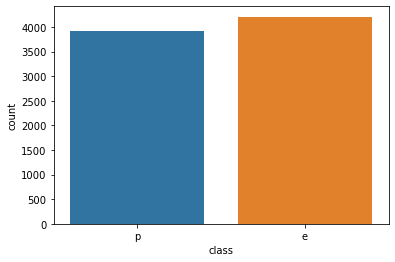

In [4]:
#Univariate Analysis
import seaborn as sns
sns.countplot(Mushroom['class'])
Mushroom['class'].value_counts() 

Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
Mushroom=Mushroom.apply(LabelEncoder().fit_transform)

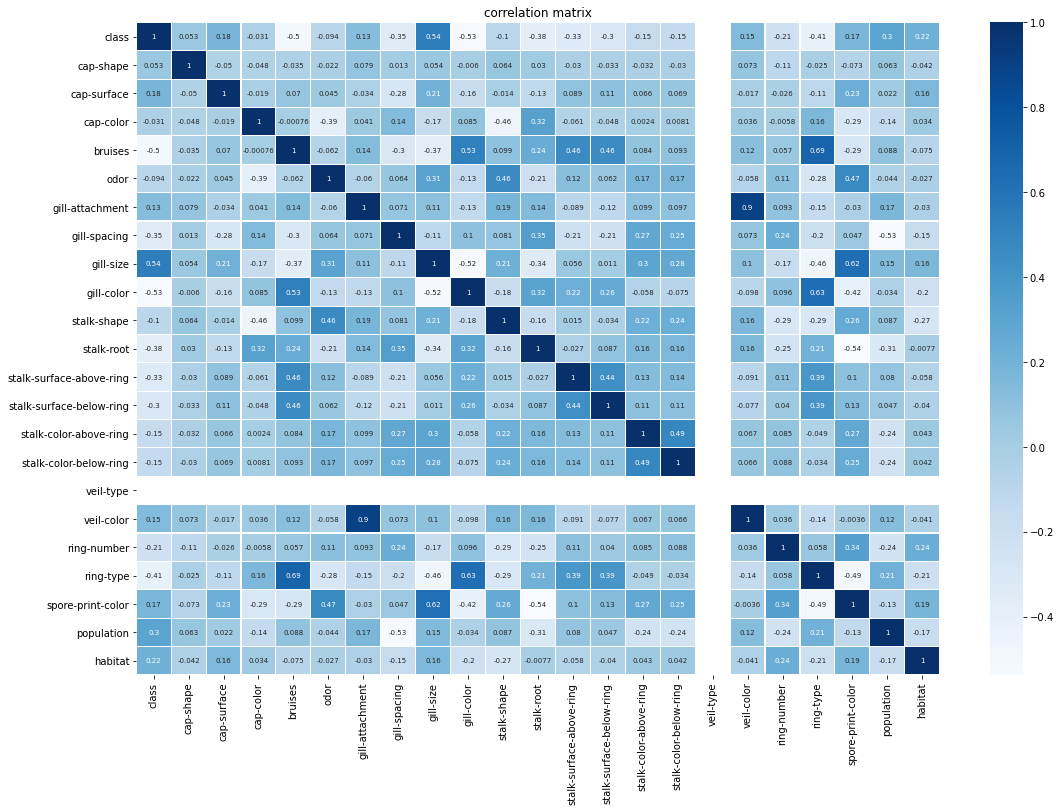

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#Multivariate Analysis
fig=plt.figure(figsize=(18,12))
hc=Mushroom.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 7})
plt.title("correlation matrix")
plt.show()

Class is highly corelated with grill-size and grill-color

In [7]:
#As we can see veil-type have only 1 values accross all the rows, If we drop it, we'll not loose any information.
Mushroom=Mushroom.drop(["veil-type"],axis=1)

## DATA CLEANING

In [8]:
Mushroom.describe() #Looking into summary so our data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Mean and Median i.e. 50% is almost near to each other. By looking at this we can say skewness is not present in data.

75% i.e. third quartile and max values are also near by so there are no outliers.

In [9]:
Mushroom.isnull().sum() #Checking for null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

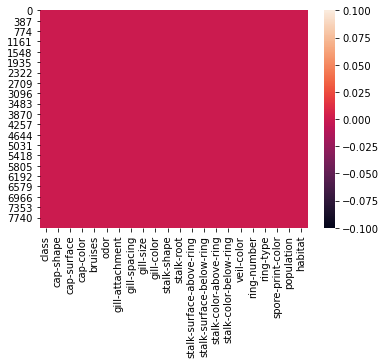

In [10]:
import seaborn as sns
sns.heatmap(Mushroom.isnull()) #Looking for null values if any, in heatmap

## Seprate independent variable and target variable

In [11]:
x=Mushroom.iloc[:,1:]
y=Mushroom.iloc[:,:1]

In [12]:
x.shape

(8124, 21)

In [13]:
y.shape

(8124, 1)

## Finding Best Random State

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.9585726004922067  on Random_state  21


## Train Test Split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)

## Finding Best Algorithm

In [16]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9585726004922067
[[1217   51]
 [  50 1120]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1268
           1       0.96      0.96      0.96      1170

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [17]:
#Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

0.8547990155865464
[[1211   57]
 [ 297  873]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1268
           1       0.94      0.75      0.83      1170

    accuracy                           0.85      2438
   macro avg       0.87      0.85      0.85      2438
weighted avg       0.87      0.85      0.85      2438



In [18]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')  #kernel='rbf'  ---->default SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9897456931911403
[[1264    4]
 [  21 1149]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1268
           1       1.00      0.98      0.99      1170

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [19]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier(criterion='gini')---------->default
#DecisionTreeClassifier(criterion='entropy')
#Gini and entropy
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [20]:
from sklearn.neighbors import KNeighborsClassifier
#k=5 KNeighbors Classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9971287940935193
[[1263    5]
 [   2 1168]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [21]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Decission Tree and Random Forest have highest Accuracy Score, it's maybe because of overfitting.

To find best algorithm, need to check cross_val_score.

## Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR ,x , y, cv=5)
print("Cross validation score of LogisticRegression :",scr.mean())

Cross validation score of LogisticRegression : 0.8392256915498295


In [23]:
scr=cross_val_score(bnb ,x , y, cv=5)
print("Cross validation score of BernoulliNB :",scr.mean())

Cross validation score of BernoulliNB : 0.7648645699128458


In [24]:
scr=cross_val_score(svc ,x , y, cv=5)
print("Cross validation score of SVC :",scr.mean())

Cross validation score of SVC : 0.8420306934444864


In [25]:
scr=cross_val_score(dtc ,x , y, cv=5)
print("Cross validation score of DecisionTreeClassifier :",scr.mean())

Cross validation score of DecisionTreeClassifier : 0.9261229253505115


In [26]:
scr=cross_val_score(knn ,x , y, cv=5)
print("Cross validation score of KNeighborsClassifier :",scr.mean())

Cross validation score of KNeighborsClassifier : 0.8815549071618036


In [27]:
scr=cross_val_score(rf ,x , y, cv=5)
print("Cross validation score of RandomForestClassifier :",scr.mean())

Cross validation score of RandomForestClassifier : 0.8995270178097764


Cross validation Acore of Decision Tree Classifier is near to it's Accuracy Score. So we'll conclude that Decision have highest accuracy.

## Hyper Parameter Tuning

In [28]:
import numpy as np
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),
             'criterion':['gini','entropy']}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

{'criterion': 'gini', 'max_depth': 8}

In [29]:
clf_pred=clf.best_estimator_.predict(x_test)

In [30]:
accuracy_score(y_test,clf_pred)

1.0

Our model learnt almost 100% and performing really well

## Performing AOC ROC

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
dtc_predict_prob = dtc.predict_proba(x_test)[:,1:]
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1:]
y_pred_prob

array([[1.77490381e-01],
       [4.21269338e-04],
       [9.21982573e-01],
       ...,
       [4.26309093e-07],
       [5.93992853e-02],
       [9.40417790e-01]])

In [32]:
fpr,tpr,thresholds=roc_curve(y_test,dtc_predict_prob) # calculating fpr, tpr

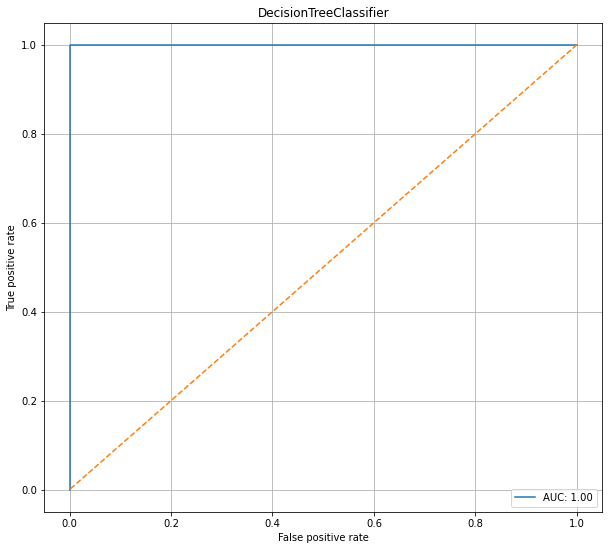

In [33]:
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

## Saving the model

In [34]:
import joblib
joblib.dump(clf.best_estimator_,"PJ1_Mushroom.pkl")
DTC_from_joblib=joblib.load('PJ1_Mushroom.pkl')
DTC_from_joblib.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1])